In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler

# `stocks` dataset

In [2]:
stocks = pd.read_csv("stocks.csv")  # Load stocks dataset

In [3]:
stocks["q"] = pd.to_datetime(stocks["q"])  # Update 'q' column so that it is a date

# `us_firms` dataset

In [4]:
us_firms = pd.read_csv("usfirms2022.csv")  # Load US firms dataset

In [5]:
# Rename columns to more familiar names
us_firms = us_firms.rename(columns = {"Ticker": "firm", "Sector NAICS\nlevel 1": "industry"})

# Merge `us_firms` and `stock` dataset

In [6]:
stocks = stocks.merge(us_firms[["firm", "industry"]], on="firm")

In [7]:
stocks = stocks[stocks["industry"] != "-"]

# Set multiindex

In [8]:
multiindex = ["industry", "firm", "q"]

In [9]:
stocks.set_index(multiindex, inplace=True)  # Set multidimensional indices

In [10]:
stocks = stocks.sort_values(by=multiindex)  # Sort indices

In [11]:
stocks.head()

revenue  cogs  sgae  \
industry                        firm q                                 
Accommodation and Food Services ARKR 2000-01-01      NaN   NaN   NaN   
                                     2000-04-01      NaN   NaN   NaN   
                                     2000-07-01      NaN   NaN   NaN   
                                     2000-10-01      NaN   NaN   NaN   
                                     2001-01-01      NaN   NaN   NaN   

                                                 otheropexp  extraincome  \
industry                        firm q                                     
Accommodation and Food Services ARKR 2000-01-01         NaN          NaN   
                                     2000-04-01         NaN          NaN   
                                     2000-07-01         NaN          NaN   
                                     2000-10-01         NaN          NaN   
                                     2001-01-01         NaN          NaN   

                                                 finexp  incometax  \
industry                        firm q                               
Accommodation and Food Services ARKR 2000-01-01     NaN        NaN   
                                     2000-04-01     NaN        NaN   
                                     2000-07-01     NaN        NaN   
                                     2000-10-01     NaN        NaN   
                                     2001-01-01     NaN        NaN   

                                                 totalassets  \
industry                        firm q                         
Accommodation and Food Services ARKR 2000-01-01          NaN   
                                     2000-04-01          NaN   
                                     2000-07-01          NaN   
                                     2000-10-01          NaN   
                                     2001-01-01          NaN   

                                                 totalliabilities  shortdebt  \
industry                        firm q                                         
Accommodation and Food Services ARKR 2000-01-01               NaN        NaN   
                                     2000-04-01               NaN        NaN   
                                     2000-07-01               NaN        NaN   
                                     2000-10-01               NaN        NaN   
                                     2001-01-01               NaN        NaN   

                                                 longdebt  stockholderequity  \
industry                        firm q                                         
Accommodation and Food Services ARKR 2000-01-01       NaN                NaN   
                                     2000-04-01       NaN                NaN   
                                     2000-07-01       NaN                NaN   
                                     2000-10-01       NaN                NaN   
                                     2001-01-01       NaN                NaN   

                                                 adjprice  originalprice  \
industry                        firm q                                     
Accommodation and Food Services ARKR 2000-01-01       NaN            NaN   
                                     2000-04-01       NaN            NaN   
                                     2000-07-01       NaN            NaN   
                                     2000-10-01       NaN            NaN   
                                     2001-01-01       NaN            NaN   

                                                 sharesoutstanding  \
industry                        firm q                               
Accommodation and Food Services ARKR 2000-01-01                NaN   
                                     2000-04-01                NaN   
                                     2000-07-01                NaN   
                                     2000-10-01                NaN

# Get finance metrics

In [12]:
stocks["cc returns"] = np.log(stocks["adjprice"]) - np.log(stocks.groupby(level=1)["adjprice"].shift(1))

In [13]:
stocks["market value"] = stocks["originalprice"] * stocks["sharesoutstanding"]

In [14]:
stocks["book value"] = stocks["totalassets"] - stocks["totalliabilities"]

In [15]:
stocks["book-to-market ratio"] = stocks["book value"] / stocks["market value"]

In [16]:
stocks["ebit"] = stocks["revenue"] - stocks["cogs"] - stocks["sgae"] - stocks["otheropexp"]

In [17]:
stocks["sales annual growth"] = stocks["revenue"] \
    / stocks.groupby(level=1)["revenue"].shift(4).replace(0, np.nan) - 1

In [18]:
stocks["operating profit growth"] = stocks["ebit"] \
    / stocks.groupby(level=1)["ebit"].shift(4).replace(0, np.nan) - 1

In [19]:
stocks["operating profit margin"] = stocks["ebit"] / stocks["revenue"].replace(0, np.nan)  # Avoid division by 0

In [20]:
stocks["short financial leverage"] = stocks["shortdebt"] / stocks["totalassets"].replace(0, np.nan)

In [21]:
stocks["long financial leverage"] = stocks["longdebt"] / stocks["totalassets"].replace(0, np.nan)

In [22]:
stocks["net income"] = stocks["ebit"] - stocks["finexp"] - stocks["incometax"] + stocks["extraincome"]

In [23]:
stocks["eps"] = stocks["net income"] / stocks["sharesoutstanding"].replace(0, np.nan)

In [24]:
stocks["epsp"] = stocks["eps"] / stocks["originalprice"].replace(0, np.nan)

In [25]:
stocks.head()

revenue  cogs  sgae  \
industry                        firm q                                 
Accommodation and Food Services ARKR 2000-01-01      NaN   NaN   NaN   
                                     2000-04-01      NaN   NaN   NaN   
                                     2000-07-01      NaN   NaN   NaN   
                                     2000-10-01      NaN   NaN   NaN   
                                     2001-01-01      NaN   NaN   NaN   

                                                 otheropexp  extraincome  \
industry                        firm q                                     
Accommodation and Food Services ARKR 2000-01-01         NaN          NaN   
                                     2000-04-01         NaN          NaN   
                                     2000-07-01         NaN          NaN   
                                     2000-10-01         NaN          NaN   
                                     2001-01-01         NaN          NaN   

                                                 finexp  incometax  \
industry                        firm q                               
Accommodation and Food Services ARKR 2000-01-01     NaN        NaN   
                                     2000-04-01     NaN        NaN   
                                     2000-07-01     NaN        NaN   
                                     2000-10-01     NaN        NaN   
                                     2001-01-01     NaN        NaN   

                                                 totalassets  \
industry                        firm q                         
Accommodation and Food Services ARKR 2000-01-01          NaN   
                                     2000-04-01          NaN   
                                     2000-07-01          NaN   
                                     2000-10-01          NaN   
                                     2001-01-01          NaN   

                                                 totalliabilities  shortdebt  \
industry                        firm q                                         
Accommodation and Food Services ARKR 2000-01-01               NaN        NaN   
                                     2000-04-01               NaN        NaN   
                                     2000-07-01               NaN        NaN   
                                     2000-10-01               NaN        NaN   
                                     2001-01-01               NaN        NaN   

                                                 ...  book-to-market ratio  \
industry                        firm q           ...                         
Accommodation and Food Services ARKR 2000-01-01  ...                   NaN   
                                     2000-04-01  ...                   NaN   
                                     2000-07-01  ...                   NaN   
                                     2000-10-01  ...                   NaN   
                                     2001-01-01  ...                   NaN   

                                                 ebit  sales annual growth  \
industry                        firm q                                       
Accommodation and Food Services ARKR 2000-01-01   NaN                  NaN   
                                     2000-04-01   NaN                  NaN   
                                     2000-07-01   NaN                  NaN   
                                     2000-10-01   NaN                  NaN   
                                     2001-01-01   NaN                  NaN   

                                                 operating profit growth  \
industry                        firm q                                     
Accommodation and Food Services ARKR 2000-01-01                      NaN   
                                     2000-04-01                      NaN   
                                     2000-07-01                      NaN   
                                    

# General questions

## Firm size

### Market value

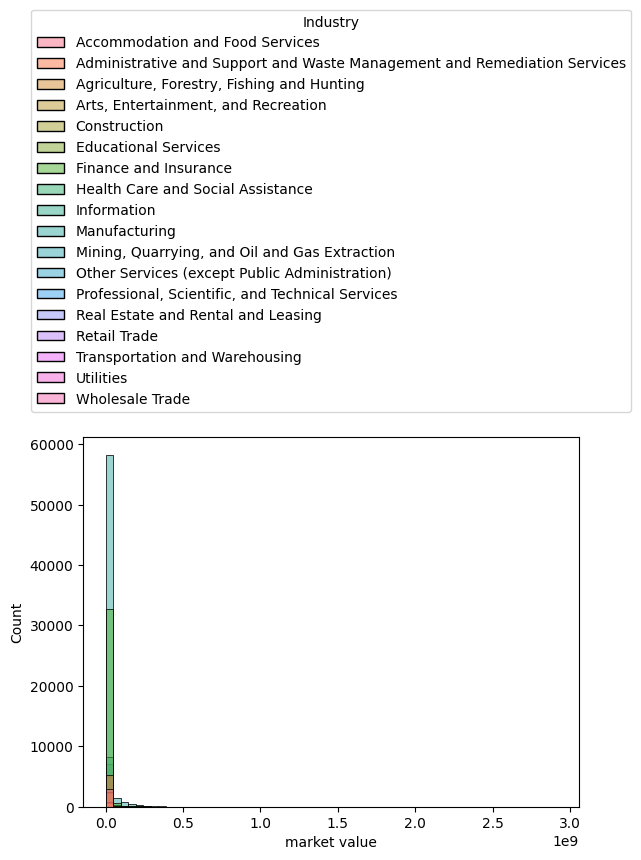

In [26]:
hist = sns.histplot(
    stocks, x="market value", bins=60,
    hue=stocks.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.05), title="Industry")

plt.show()

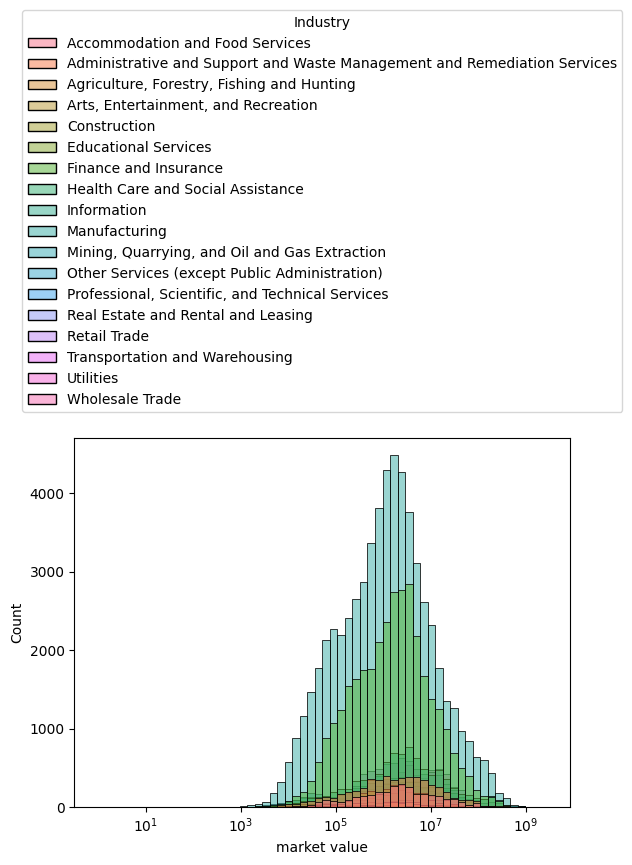

In [27]:
# Log scale net income
hist = sns.histplot(
    stocks, x="market value", bins=60,
    hue=stocks.index.get_level_values("industry"), common_norm=False, log_scale=True
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.05), title="Industry")

plt.show()

### Book value 

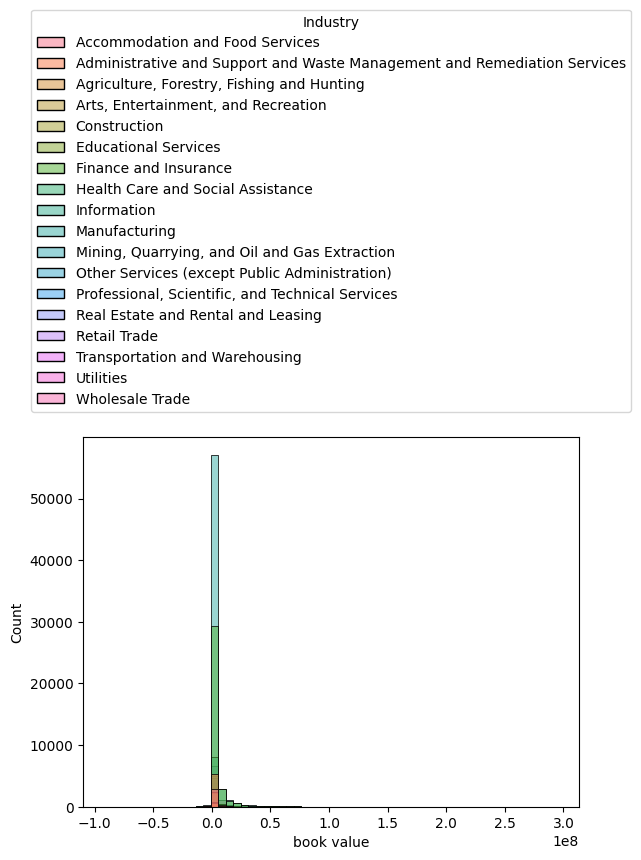

In [28]:
hist = sns.histplot(
    stocks, x="book value", bins=60,
    hue=stocks.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.05), title="Industry")

plt.show()

## Sales performance and profitability

### Net income

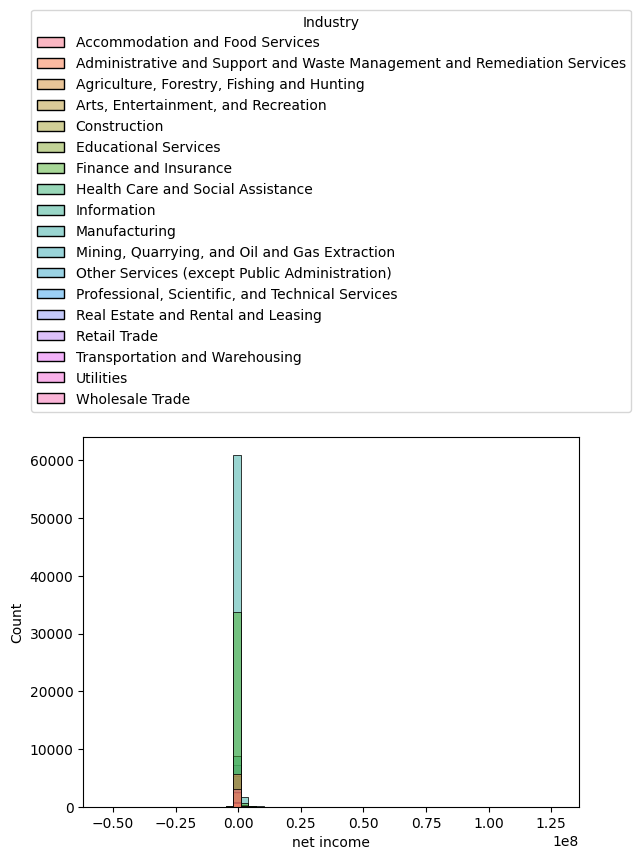

In [29]:
hist = sns.histplot(
    stocks, x="net income", bins=60,
    hue=stocks.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.05), title="Industry")

plt.show()

### Earnings per share

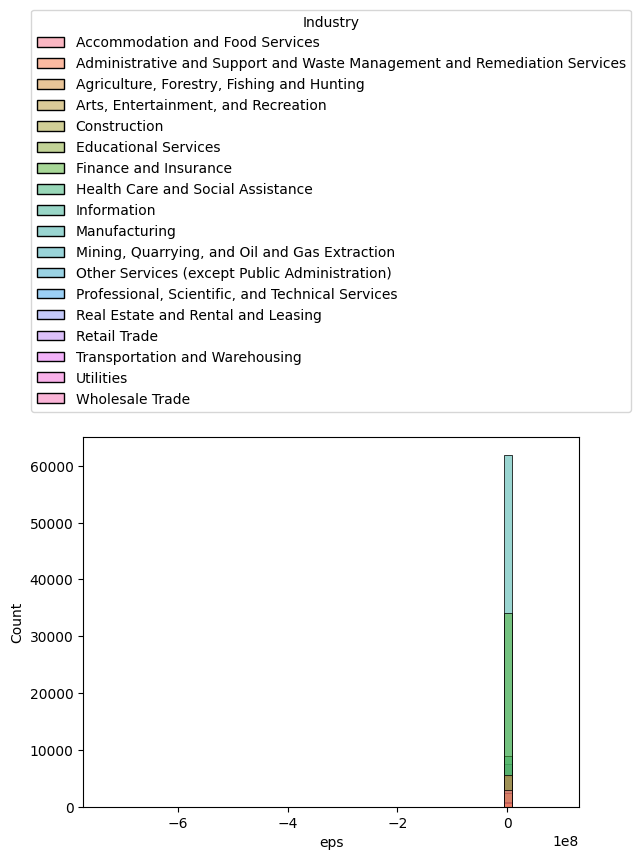

In [30]:
hist = sns.histplot(
    stocks, x="eps", bins=60,
    hue=stocks.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.05), title="Industry")

plt.show()

# Specific questions

## Descriptive statistics

### Firms by industry

In [31]:
last_quarter = stocks.index.levels[2][-1]

In [32]:
stocks_last_quarter = stocks.loc[:, :, last_quarter]

In [33]:
stocks_last_quarter

revenue       cogs      sgae  \
industry                        firm                                   
Accommodation and Food Services ARKR    53218.0        0.0   47797.0   
                                ARMK  4127378.0  3747828.0  231664.0   
                                BBQ     79938.0        0.0   75445.0   
                                BDL     40675.0        0.0   38592.0   
                                BH      92367.0    54268.0   24382.0   
...                                         ...        ...       ...   
Wholesale Trade                 WEYS    74359.0    44589.0   24105.0   
                                WLFC    78075.0        0.0   52567.0   
                                WSO   2133755.0  1538222.0  314753.0   
                                WSTG    67863.0    55377.0    8379.0   
                                ZEUS   709176.0   560546.0   94765.0   

                                      otheropexp  extraincome   finexp  \
industry                        firm                                     
Accommodation and Food Services ARKR         0.0        992.0    253.0   
                                ARMK         0.0       -152.0  91466.0   
                                BBQ          0.0        836.0    165.0   
                                BDL          0.0        -49.0    177.0   
                                BH          20.0    -105241.0   4945.0   
...                                          ...          ...      ...   
Wholesale Trade                 WEYS         0.0        181.0    -78.0   
                                WLFC         0.0       1469.0  16023.0   
                                WSO      -6317.0     -32949.0   1110.0   
                                WSTG         0.0       -442.0      7.0   
                                ZEUS         0.0        -15.0   2271.0   

                                      incometax  totalassets  \
industry                        firm                           
Accommodation and Food Services ARKR      905.0     182780.0   
                                ARMK    15939.0   14988770.0   
                                BBQ       985.0     234605.0   
                                BDL        22.0     139409.0   
                                BH     -22709.0     773352.0   
...                                         ...          ...   
Wholesale Trade                 WEYS     1429.0     268760.0   
                                WLFC     5046.0    2396383.0   
                                WSO     60481.0    3788592.0   
                                WSTG      867.0     179003.0   
                                ZEUS    13955.0    1086116.0   

                                      totalliabilities  shortdebt  ...  \
industry                        firm                               ...   
Accommodation and Food Services ARKR          123286.0    13035.0  ...   
                                ARMK        12073509.0   148359.0  ...   
                                BBQ           163260.0    16301.0  ...   
                                BDL            67057.0     5214.0  ...   
                                BH            267616.0    17019.0  ...   
...                                                ...        ...  ...   
Wholesale Trade                 WEYS           65323.0     8711.0  ...   
                                WLFC         2021489.0        0.0  ...   
                                WSO          1568817.0    88600.0  ...   
                                WSTG          124590.0      999.0  ...   
                                ZEUS          586557.0     6127.0  ...   

                                      book-to-market ratio      ebit  \
industry                        firm                                   
Accommodation and Food Services ARKR              0.930434    5421.0   
                                ARMK              0.369902  147886.0   
                                BBQ               0.6365

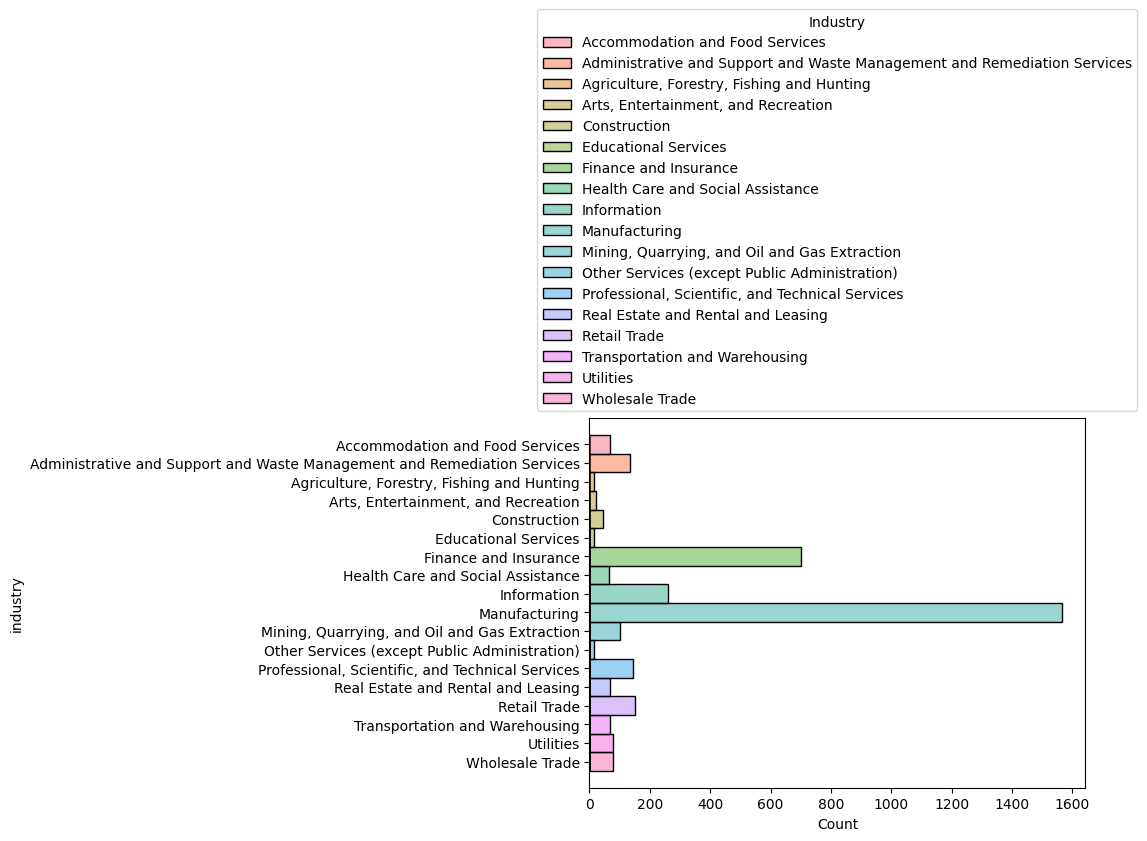

In [34]:
hist = sns.histplot(
    data=stocks_last_quarter,
    y=stocks_last_quarter.index.get_level_values("industry"),
    hue=stocks_last_quarter.index.get_level_values("industry"),
    common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.0), title="Industry")

plt.show()

### Book value by industry

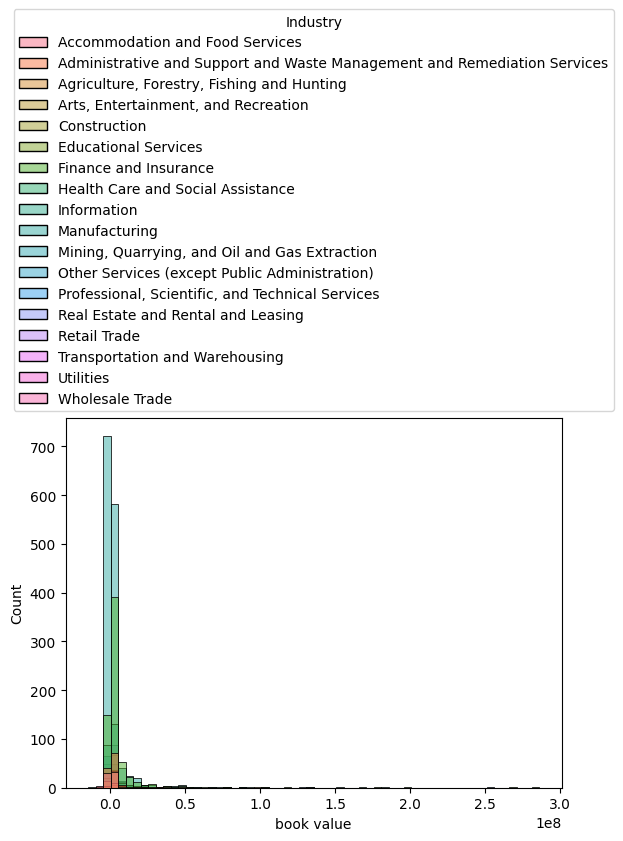

In [35]:
hist = sns.histplot(
    stocks_last_quarter, x="book value", bins=60,
    hue=stocks_last_quarter.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.0), title="Industry")

plt.show()

### Market value by industry

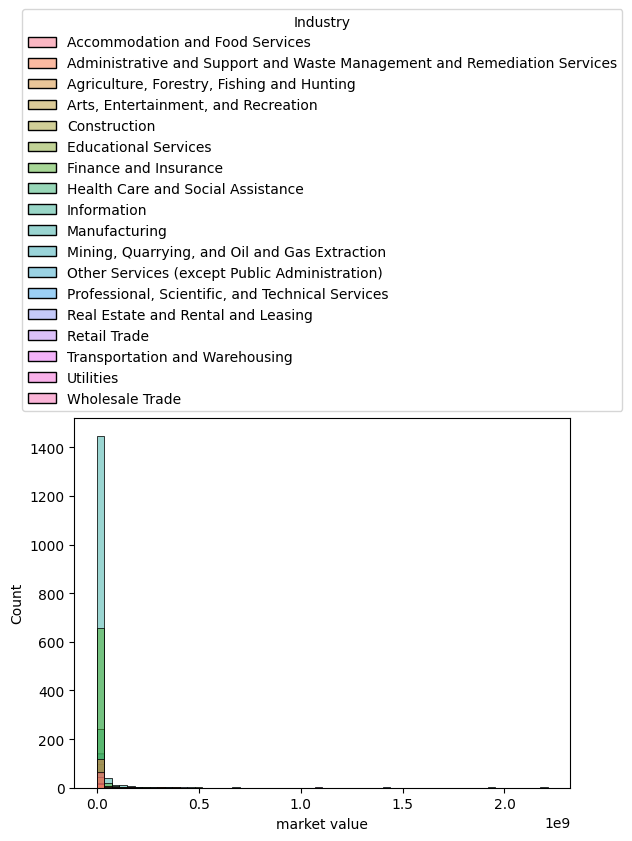

In [36]:
hist = sns.histplot(
    stocks_last_quarter, x="market value", bins=60,
    hue=stocks_last_quarter.index.get_level_values("industry"), common_norm=False
)

sns.move_legend(hist, "lower center", bbox_to_anchor=(0.5, 1.0), title="Industry")

plt.show()

By examining the above histograms, it can be seen that both the market value and book value of the firms across different industries are skewed to the left. Because of this, to get a sense of the typical of these metrics, the median of both metrics is measured.

In [37]:
stocks_last_quarter.index.levels[0].values

array(['Accommodation and Food Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Agriculture, Forestry, Fishing and Hunting',
       'Arts, Entertainment, and Recreation', 'Construction',
       'Educational Services', 'Finance and Insurance',
       'Health Care and Social Assistance', 'Information',
       'Manufacturing', 'Mining, Quarrying, and Oil and Gas Extraction',
       'Other Services (except Public Administration)',
       'Professional, Scientific, and Technical Services',
       'Real Estate and Rental and Leasing', 'Retail Trade',
       'Transportation and Warehousing', 'Utilities', 'Wholesale Trade'],
      dtype=object)

In [38]:
typical_market_value = {
    industry: stocks_last_quarter.loc[industry, "market value"].median()
    for industry in stocks_last_quarter.index.levels[0].values
}

In [39]:
typical_market_value = pd.DataFrame(
    data={
        "industry": typical_market_value.keys(),
        "median market value": typical_market_value.values()
    }
)

In [40]:
typical_book_value = {
    industry: stocks_last_quarter.loc[industry, "book value"].median()
    for industry in stocks_last_quarter.index.levels[0].values
}

In [41]:
typical_book_value = pd.DataFrame(
    data={
        "industry": typical_book_value.keys(),
        "median book value": typical_book_value.values()
    }
)

In [42]:
typical_book_value.head()

,industry,median book value
0,Accommodation and Food Services,243717.500
1,Administrative and Support and Waste Managemen...,566167.000
2,"Agriculture, Forestry, Fishing and Hunting",1104345.000
3,"Arts, Entertainment, and Recreation",67242.769
4,Construction,998146.500


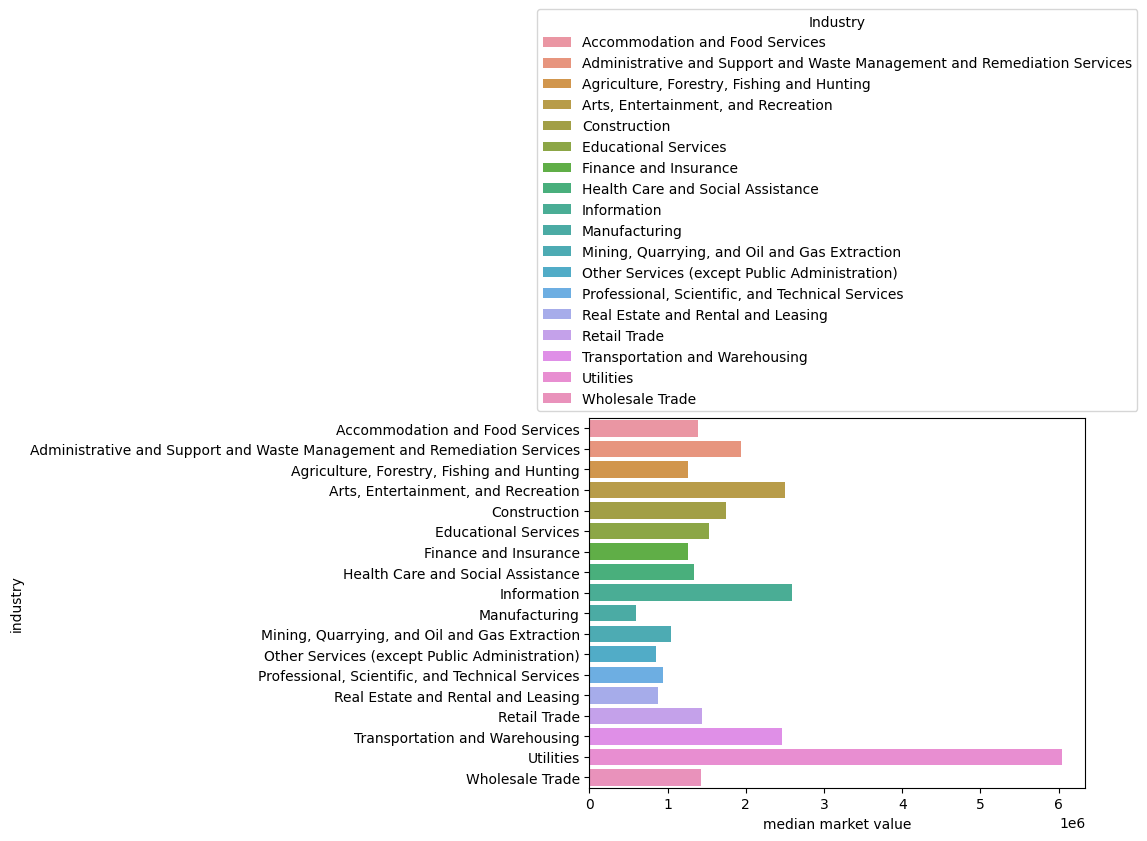

In [43]:
bar = sns.barplot(data=typical_market_value, x="median market value", y="industry", hue="industry", dodge=False)

sns.move_legend(bar, "lower center", bbox_to_anchor=(0.5, 1.0), title="Industry")

plt.show()

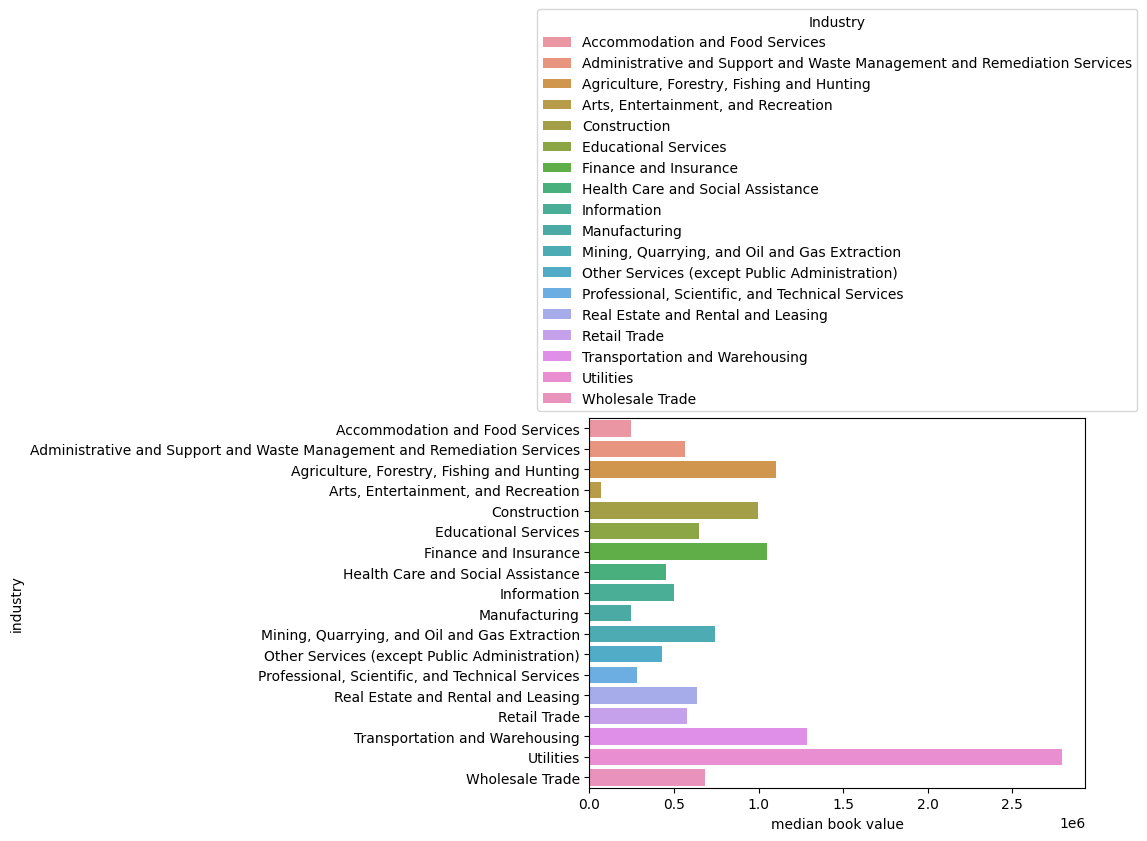

In [44]:
bar = sns.barplot(data=typical_book_value, x="median book value", y="industry", hue="industry", dodge=False)

sns.move_legend(bar, "lower center", bbox_to_anchor=(0.5, 1.0), title="Industry")

plt.show()

In [45]:
typical_firm_size = typical_market_value.merge(typical_book_value, on="industry")

In [46]:
typical_firm_size.head()

,industry,median market value,median book value
0,Accommodation and Food Services,1.394617e+06,243717.500
1,Administrative and Support and Waste Managemen...,1.938284e+06,566167.000
2,"Agriculture, Forestry, Fishing and Hunting",1.264045e+06,1104345.000
3,"Arts, Entertainment, and Recreation",2.504698e+06,67242.769
4,Construction,1.745045e+06,998146.500


## Statistical modeling

### Winsorization

In [47]:
stocks_manufacturing = stocks.loc["Manufacturing"]

In [48]:
stocks_manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 140841 entries, ('A', Timestamp('2000-01-01 00:00:00')) to ('ZYNE', Timestamp('2022-04-01 00:00:00'))
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   revenue                   63019 non-null   float64
 1   cogs                      62985 non-null   float64
 2   sgae                      62985 non-null   float64
 3   otheropexp                62985 non-null   float64
 4   extraincome               63019 non-null   float64
 5   finexp                    63019 non-null   float64
 6   incometax                 63019 non-null   float64
 7   totalassets               63474 non-null   float64
 8   totalliabilities          63474 non-null   float64
 9   shortdebt                 63306 non-null   float64
 10  longdebt                  63472 non-null   float64
 11  stockholderequity         63474 non-null   float64
 12  adjprice                  

In [49]:
stocks_manufacturing = stocks_manufacturing.clip(  # Winsorize dataset to remove most outliers
    lower=stocks_manufacturing.quantile(0.01),
    upper=stocks_manufacturing.quantile(0.99),
    axis=1
)

In [50]:
def get_firm_size(row):
    firm_size = ""
    
    if row["market value"] < stocks_manufacturing["market value"].quantile(1/3):
        firm_size = "small"
    elif row["market value"] < stocks_manufacturing["market value"].quantile(2/3):
        firm_size = "medium"
    else:
        firm_size = "big"
        
    return firm_size

In [59]:
stocks_manufacturing["firm size"] = np.where(
    stocks_manufacturing["market value"] < stocks_manufacturing["market value"].quantile(1/3),
    "small",
    "medium"
)

In [60]:
stocks_manufacturing["firm size"] = np.where(
    stocks_manufacturing["market value"] >= stocks_manufacturing["market value"].quantile(2/3),
    "big",
    stocks_manufacturing["firm size"]
)

In [61]:
stocks_manufacturing["firm size"].value_counts()

medium    99959
big       20441
small     20441
Name: firm size, dtype: int64

In [50]:
dependent_variable = "cc returns"

In [51]:
independent_variables = [
    "eps",
    "net income",
    "operating profit margin",
    "operating profit growth",
    "sales annual growth", 
    "ebit",
    "short financial leverage",
    "long financial leverage",
    "book-to-market ratio"
]

In [52]:
columns = [dependent_variable] + independent_variables

In [53]:
stats_model = stocks_manufacturing[columns]

Apply min-max normalization to values.

In [54]:
stats_model = pd.DataFrame(
    MinMaxScaler().fit_transform(stats_model),
    columns=columns
)

In [56]:
stats_model.describe()

,cc returns,eps,net income,operating profit margin,operating profit growth,sales annual growth,ebit,short financial leverage,long financial leverage,book-to-market ratio
count,62601.000000,61951.000000,62985.000000,57319.000000,56723.000000,52104.000000,62985.000000,63305.000000,63470.000000,61024.000000
mean,0.549547,0.428516,0.130897,0.976148,0.452315,0.138300,0.100687,0.075689,0.202233,0.342850
std,0.159432,0.137118,0.130984,0.117744,0.097278,0.112212,0.135835,0.154025,0.210359,0.155798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478469,0.362005,0.092652,0.997080,0.436726,0.108610,0.058264,0.000000,0.004719,0.245941
50%,0.564290,0.409107,0.096010,0.997793,0.451639,0.120884,0.061874,0.017052,0.160008,0.305574
75%,0.634343,0.480913,0.110709,0.998124,0.464471,0.136681,0.080227,0.076246,0.322591,0.400790
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


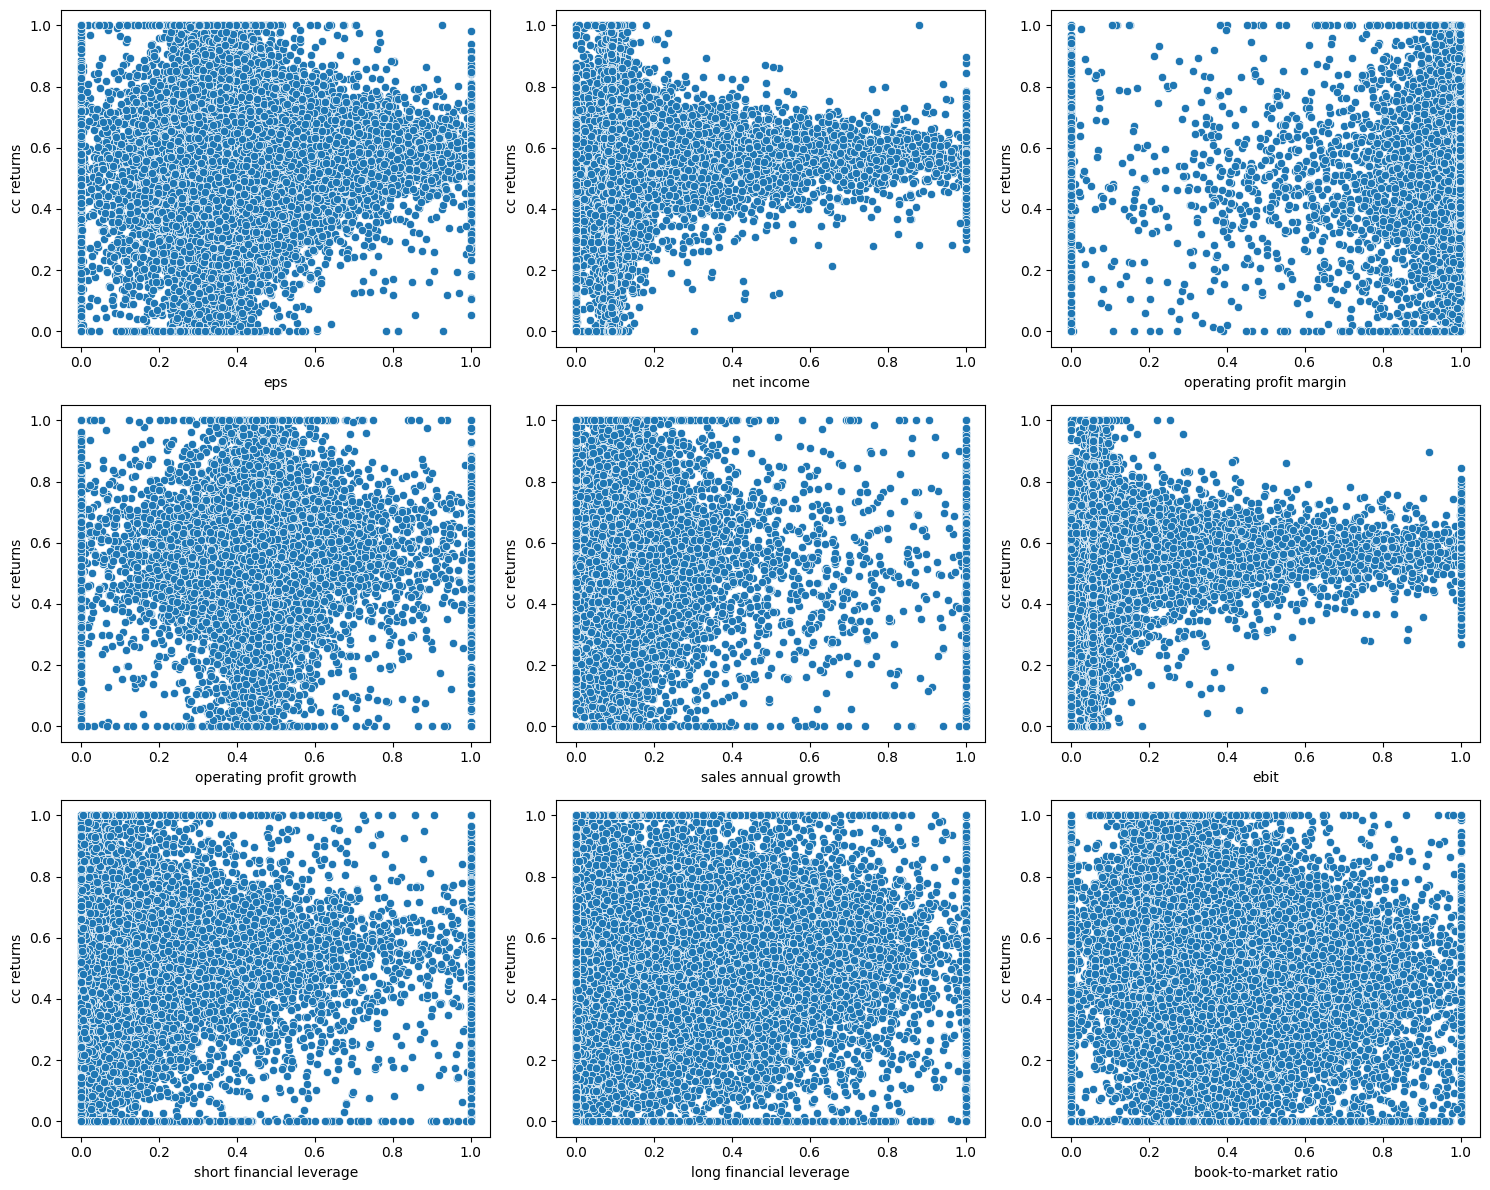

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

n_fig = 0

for ivar in independent_variables:
    splot = sns.scatterplot(
        data=stats_model,
        x=ivar,
        y=dependent_variable,
        ax=axes[n_fig // 3, n_fig % 3]
    )
    
    n_fig += 1
    
fig.tight_layout()

As it can be seen from the above histogram, there is no linear regression in any of the considered parameters. However, to train the linear regression for this deliverable, `net income`, `short financial leverage`, `sales annual growth`, and `eps` will be used for the model as they appear to have at least some degree of linear behaviour compared to the rest of variables that do not seem to be lineary related.

In [58]:
independent_variables_model = ["eps", "net income", "short financial leverage", "sales annual growth"]

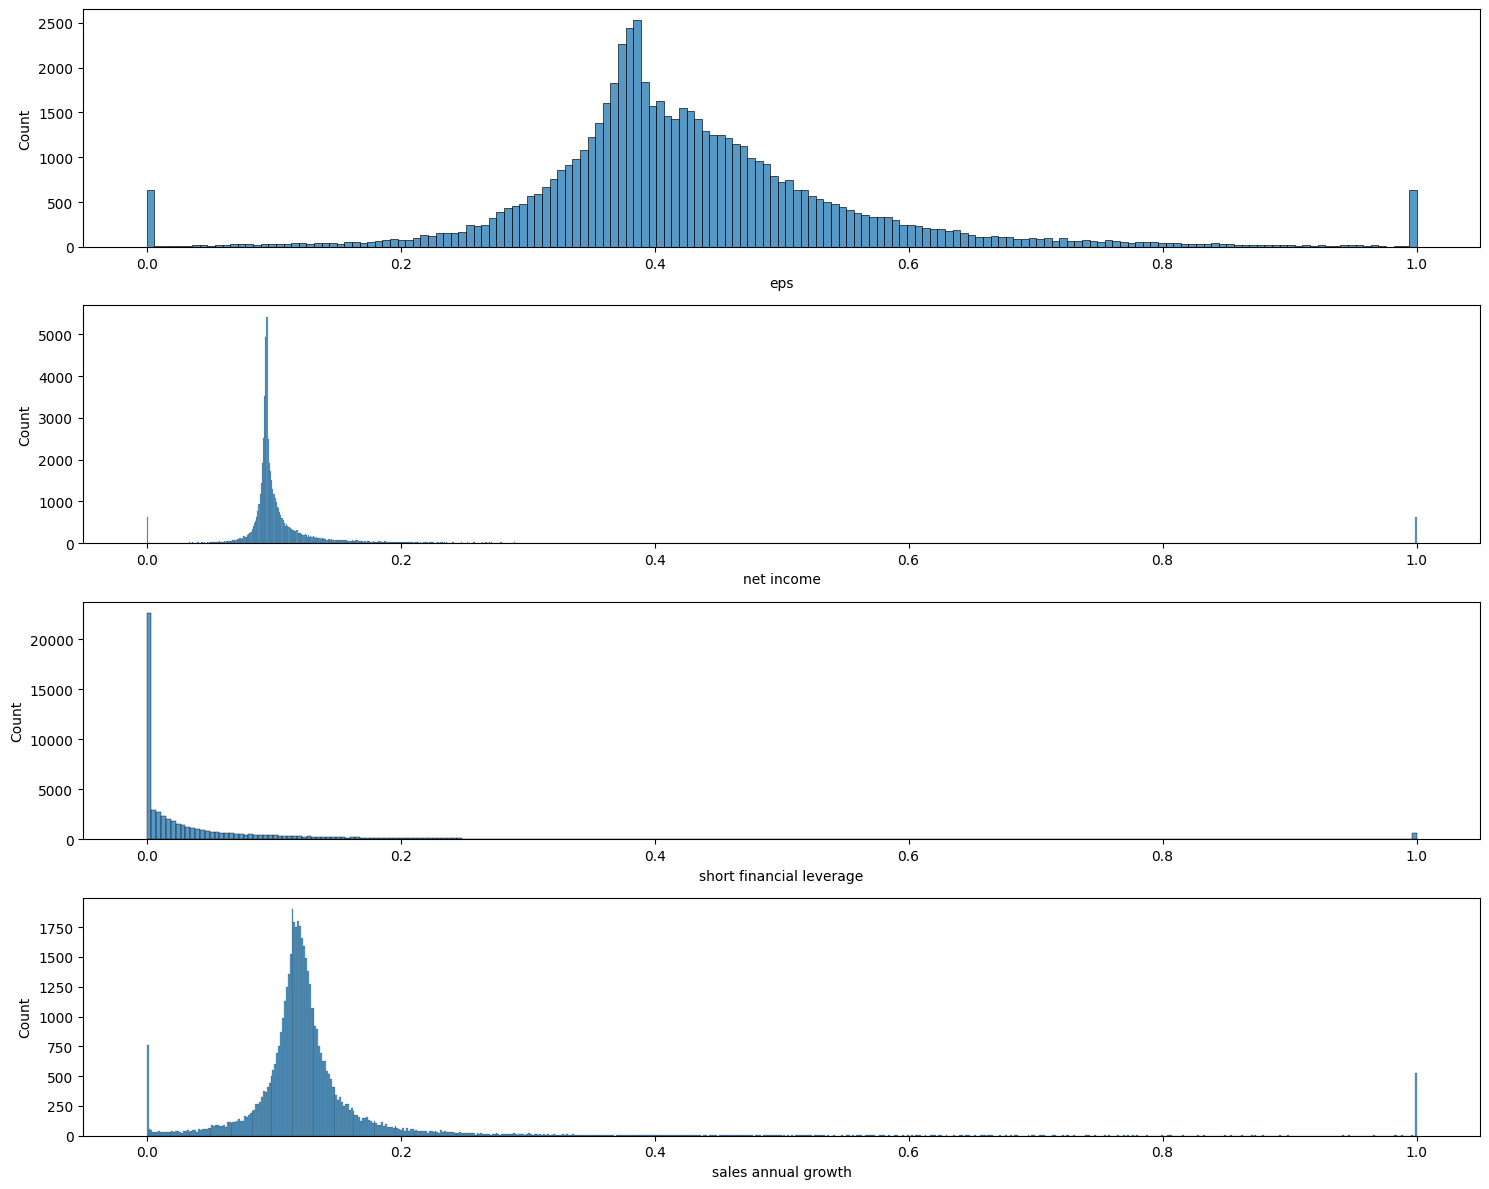

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,12))

n_fig = 0

for ivar in independent_variables_model:
    hist = sns.histplot(stats_model, x=ivar, ax=axes[n_fig])
    n_fig += 1
    
plt.tight_layout()

From the above histograms, it is possible to get a sense of the typical values for each of the factors. Because three of the histograms are skewed to the left, the typical value of these factor will correspond to the median. For the `eps` factor the mean is more appropiate sinde the distribution appears to have a normal behaviour.

Another remarkable insight is that histogram still present some outliers at their tails even after applying winsorization of 1% to the data.

In [60]:
typical_eps = stats_model["eps"].mean()

In [61]:
typical_net_income = stats_model["net income"].median()

In [62]:
typical_short_financial_leverage = stats_model["short financial leverage"].median()

In [63]:
typical_sales_annual_growth = stats_model["sales annual growth"].median()

In [64]:
print("Typical eps:", typical_eps)

Typical eps: 0.4285163662000567


In [65]:
print("Typical net income:", typical_net_income)

Typical net income: 0.09601017613612693


In [66]:
print("Typical short financial leverage:", typical_short_financial_leverage)

Typical short financial leverage: 0.017051605852086683


In [67]:
print("Typical sales annual growth:", typical_sales_annual_growth)

Typical sales annual growth: 0.12088412767355848


Additionally, to get a sense of the dispersion of the chosen factor, the standard deviation can be calculated for each factor.

In [68]:
eps_std = stats_model["eps"].std()

In [69]:
net_income_std = stats_model["net income"].std()

In [70]:
short_financial_leverage_std = stats_model["short financial leverage"].std()

In [71]:
sales_annual_growth_std = stats_model["sales annual growth"].std()

In [72]:
print("eps standard deviation:", eps_std)

eps standard deviation: 0.1371182989161032


In [73]:
print("Net income standard deviation:", net_income_std)

Net income standard deviation: 0.13098414551017823


In [74]:
print("Short financial leverage standard deviation:", short_financial_leverage_std)

Short financial leverage standard deviation: 0.15402450584465838


In [75]:
print("Sales annual growth standard deviation:", sales_annual_growth_std)

Sales annual growth standard deviation: 0.11221181055990145


# Multiple regression

In [77]:
X = stats_model[independent_variables_model]

In [81]:
y = stats_model[[dependent_variable]]

---

# EDA

## US firms by indutry

---

# Glossary

## Firm size measures

$$
\text{book value} = \text{total assets} - \text{total liabilities}
$$

$$
\begin{aligned}
\text{market value} &= \text{historical stock price} \times |\text{shares}|\\
                    &= \text{original price} \times \text{share outstanding}
\end{aligned}
$$

## Profit margin measures

$$
\text{operating profit margin} = \frac{\text{operating profit}}{\text{sales}}
$$

$$
\text{operating profit} = \text{revenue} - \text{cogs} - \text{sgae}
$$

$$
\text{cogs} = \text{cost of good sold} = \text{variable cost}
$$

$$
\text{sgae} = \text{sales and general administrative expenses} = \text{fixe costs}
$$

$$
\begin{aligned}
\text{ebit} &= \text{earnings before interest and taxes} = \text{opearting profit} \\
            &= \text{revenue} - \text{cogs} - \text{sgae} - \text{otheropexp}
\end{aligned}
$$

$$
\text{operating profit margin} = \text{opm} = \frac{\text{ebit}}{\text{revenue}}
$$

$$
\text{profit margin} = \frac{\text{net income}}{\text{sales}}
$$